# Demistifying some ML terms for developers

Machine Learning has a lot of new terminology that might not be used every day by many developers.  Don't let these intimidate you.  Let's break a few of them down!

# Matrixes & Vectors
- Maxtrixes: just **spreadsheets** - or arrays of arrays - or a collection of vectors
- Vectors: just a **column** in a spreadsheet - or a series - or a single array

# Features
- just the **variables** for each data record - the column names of your data
- features can be **continuous** (prices, numbers, scales) or **categorical** (labels, class, lists, types, enums)

![spreadsheet.png](spreadsheet.png)



# Variable Naming Conventions for ML
- **$\mathbf X$** is a matrix of your data set - each row is a record & each column is a feature
- **$\mathbf y$** is a vector of the truth labels or values (eg. actual known sale price of a house, or the correct class label 'Lightning McQueen')
- **$\mathbf{\hat y}$** _(y-hat)_ is a vector of your models predictions (values or labels)
- **Shape** is the dimensions of your matrix. 
  - If you have a dataframe with 100 items and 3 feature columns, shape would be (100,3)
  
  
# Derivatives
- just the gradient or **slope of line** at a given point on the graph

<IPython.core.display.Javascript object>


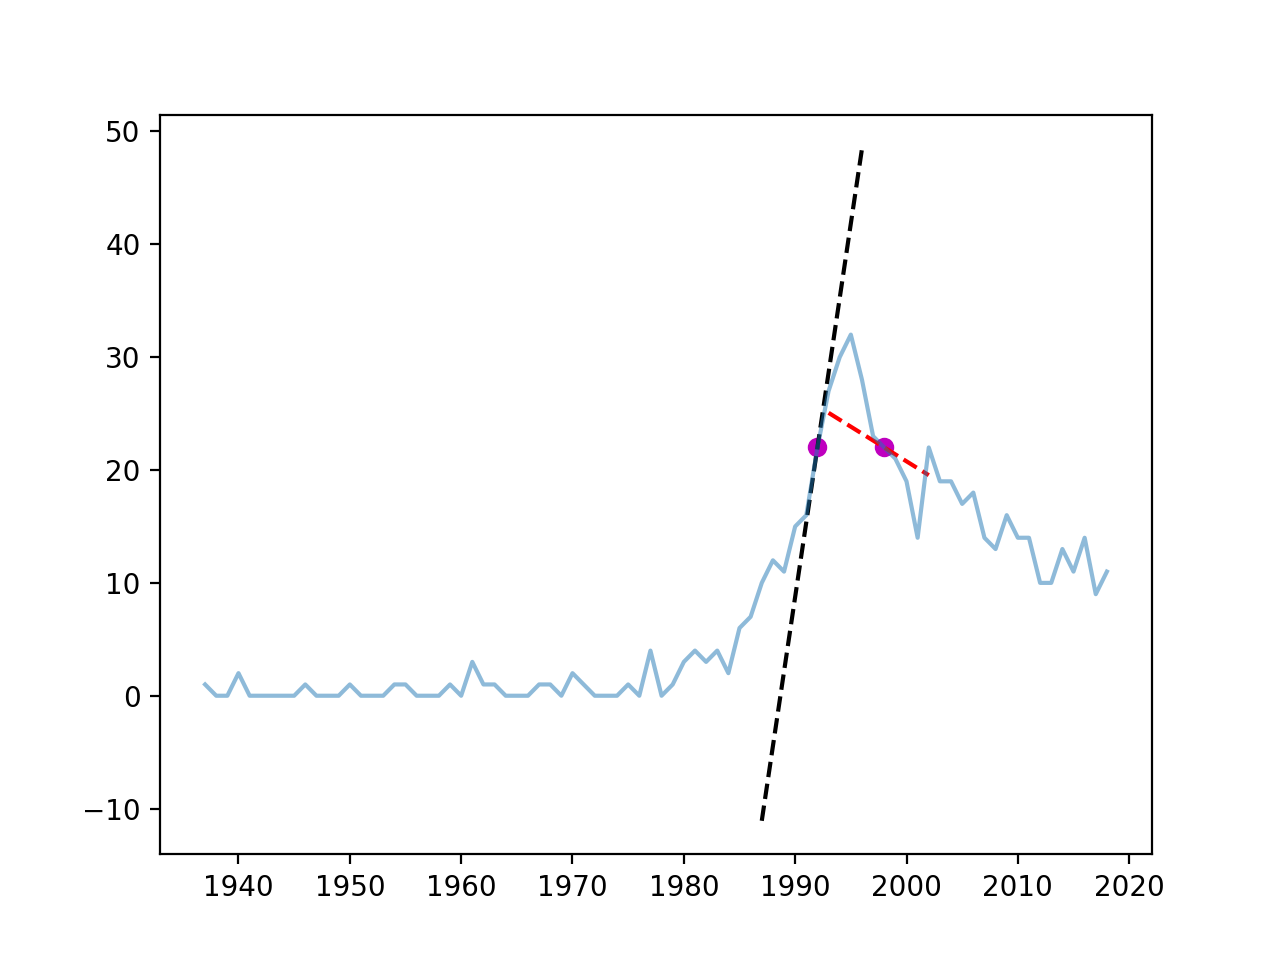

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot,show
from scipy import interpolate

# Number of Walt Disney company movies produecd each year
data = np.array([[1937,1],[1938,0],[1939,0],[1940,2],[1941,0],[1942,0],[1943,0],[1944,0],[1945,0],[1946,1],[1947,0],[1948,0],[1949,0],[1950,1],[1951,0],[1952,0],[1953,0],[1954,1],[1955,1],[1956,0],[1957,0],[1958,0],[1959,1],[1960,0],[1961,3],[1962,1],[1963,1],[1964,0],[1965,0],[1966,0],[1967,1],[1968,1],[1969,0],[1970,2],[1971,1],[1972,0],[1973,0],[1974,0],[1975,1],[1976,0],[1977,4],[1978,0],[1979,1],[1980,3],[1981,4],[1982,3],[1983,4],[1984,2],[1985,6],[1986,7],[1987,10],[1988,12],[1989,11],[1990,15],[1991,16],[1992,22],[1993,27],[1994,30],[1995,32],[1996,28],[1997,23],[1998,22],[1999,21],[2000,19],[2001,14],[2002,22],[2003,19],[2004,19],[2005,17],[2006,18],[2007,14],[2008,13],[2009,16],[2010,14],[2011,14],[2012,10],[2013,10],[2014,13],[2015,11],[2016,14],[2017,9],[2018,11]])

# Showing Derivative slope tangent line
# Adapted from post at https://glowingpython.blogspot.com/2013/02/visualizing-tangent.html
def draw_tangent(x,y,a,color):
 # interpolate the data with a spline
 spl = interpolate.splrep(x,y)
 small_t = np.arange(a-5,a+5)
 fa = interpolate.splev(a,spl,der=0)     # f(a)
 fprime = interpolate.splev(a,spl,der=1) # f'(a)
 tan = fa+fprime*(small_t-a) # tangent
 plot(a,fa,'om',small_t,tan,'--'+color)

# use python's slicing to select all rows from column 0 
year = data[:,0]
# use python's slicing to select all rows from column 1
num_movies = data[:,1]

draw_tangent(year,num_movies,1992,'k')
draw_tangent(year,num_movies,1998,'r')

plot(year,num_movies,alpha=0.5)
show()

# Gradient Descent
- just taking the fastest way down the hill - imagine taking a 360 degree look around & then taking a small step in the steepest direction
- good examples visualizing & animating this at: http://tiao.io/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [15]:
from IPython.lib.display import YouTubeVideo
kwargs = {modestbranding': 1, 'rel':0, 'end':22}
YouTubeVideo('vWFjqgb-ylQ',start=4, width=500,height=300,**kwargs)

SyntaxError: invalid syntax (<ipython-input-15-02cfdbccaf84>, line 2)

# Cost and Loss Functions
- a way to calculate how much error the current model iteration has
- a way to graph how well your model fits your data as you adjust your models variables to various values searching for lowest cost/loss

Great post here with additional visualizations of derivatives, gradient descent, and cost functions
https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a

# Supervised Learning
- Using **labeled** data with known defined training examples to learn data patterns

# Unsupervised Learning
- **Clustering** & automatic grouping without labeling data
- attempting to determine structure in data without knowing the inherent labels or structure

# Classification
- Prediction of a finite number of discreet values/**labels** which are called 'classes'
  - eg. Classify this image as values from a list: ( Mickey | Minnie | Donald Duck | None )

<IPython.core.display.Javascript object>


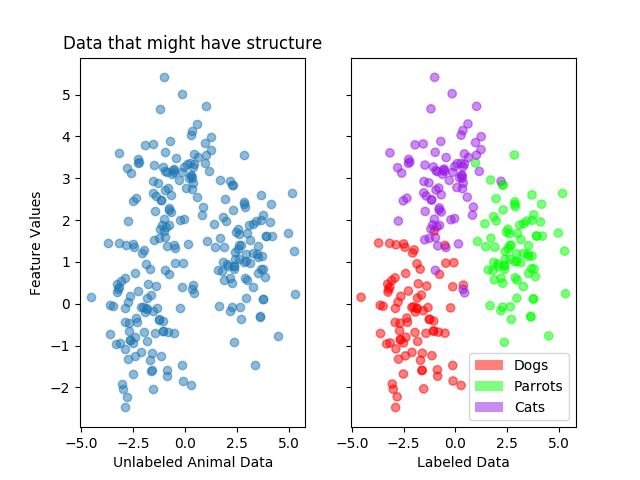

In [18]:
# Show how unsupervised learning, or supervised learning classification could be applied to mock('toy') data
%matplotlib notebook
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# Generate some example data clusters from SKLearns utility.  
# This can be used to test classifiers or visualize examples.
centers = [[-2,-.5],[3,1.3],[-.5,3]]
X, y = make_blobs(n_samples=250, centers=centers, n_features=2, random_state=0,center_box=(-15,15))

# creating a custom color map so we can plot scatters with matching colors in Truth labels & legend
cmap_name = 'my_color_list'
#        --- red ---     --- blue ---   --- purple ---        # colors at 0.5 alpha (opacity)
colors = [(1, 0, 0,0.5), (0, 1, 0,0.5), (0.6, 0.1, 0.9,0.5)]  # R -> G -> B
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

# plt.scatter(X[:,0], X[:,1],  c=y, label='data')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# 1st plot - what your data would look like without labels
ax1.scatter(X[:,0], X[:,1], alpha=.5, label='classes')
# 2nd plot - what your data would look like with Truth labels applied
ax2.scatter(X[:,0], X[:,1], c=y, cmap=cm)

ax1.set_title('Data that might have structure')
ax1.set_xlabel('Unlabeled Animal Data')
ax1.set_ylabel('Feature Values')
ax2.set_xlabel('Labeled Data')

class_labels = ['Dogs','Parrots','Cats']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,class_labels,loc=4)

plt.show()


<IPython.core.display.Javascript object>


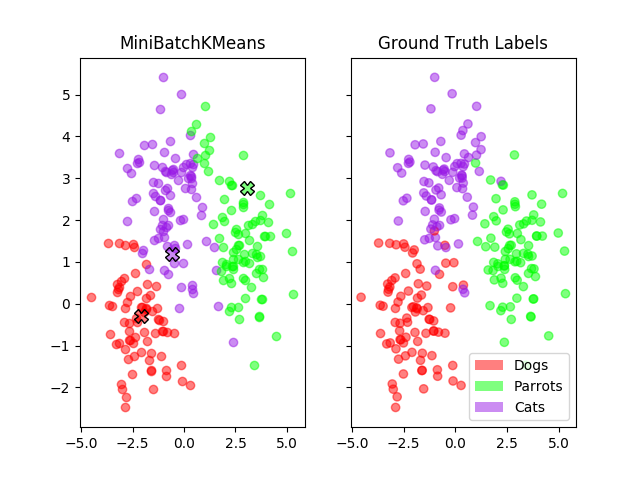

In [20]:
# Compare Unsupervised clustering using KMeans to Truth set
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

n_clusters = len(centers)
mbkmeans = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=10, n_init=10, max_no_improvement=10, verbose=0)
mbkmeans.fit(X)
mbk_means_cluster_centers = np.sort(mbkmeans.cluster_centers_, axis=0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
true_cluster_centers = np.sort(mbkmeans.cluster_centers_, axis=0)
true_labels = pairwise_distances_argmin(X, true_cluster_centers)


# MiniBatchKMeans
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# --HACK-- change order of KMeans colors so they match Truth labels
colors = [(1, 0, 0,0.5),(0.6, 0.1, 0.9,0.5), (0, 1, 0,0.5) ]  # R -> G -> B

for k, color in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = true_cluster_centers[k]
    
    ax1.scatter(X[my_members, 0], X[my_members, 1], c=color, cmap=cm)
    ax1.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=color, markeredgecolor='k', markersize=10)
    
# 2nd plot - what your data would look like with Truth labels applied
ax2.scatter(X[:,0], X[:,1], c=y, cmap=cm)
# ax2.plot(X[my_members, 0], X[my_members, 1], 'o', markerfacecolor=color, marker='.')

ax1.set_title('MiniBatchKMeans')
ax2.set_title('Ground Truth Labels')
plt.legend(recs,class_labels,loc=4)
plt.show()



# Regression
- Predicting a continuous output value based on input variables
  -  eg. Predict a Guest's 'spend' at Disney World based on how many 'days' they attend the parks

# Multivariate Linear Regression
Sounds complex but lets break it down :)
- Regression: a continous value output
- Linear: using a straight line (non-polynomial/quadratic/etc)
- Multivariate: multiple input variables (not just one)

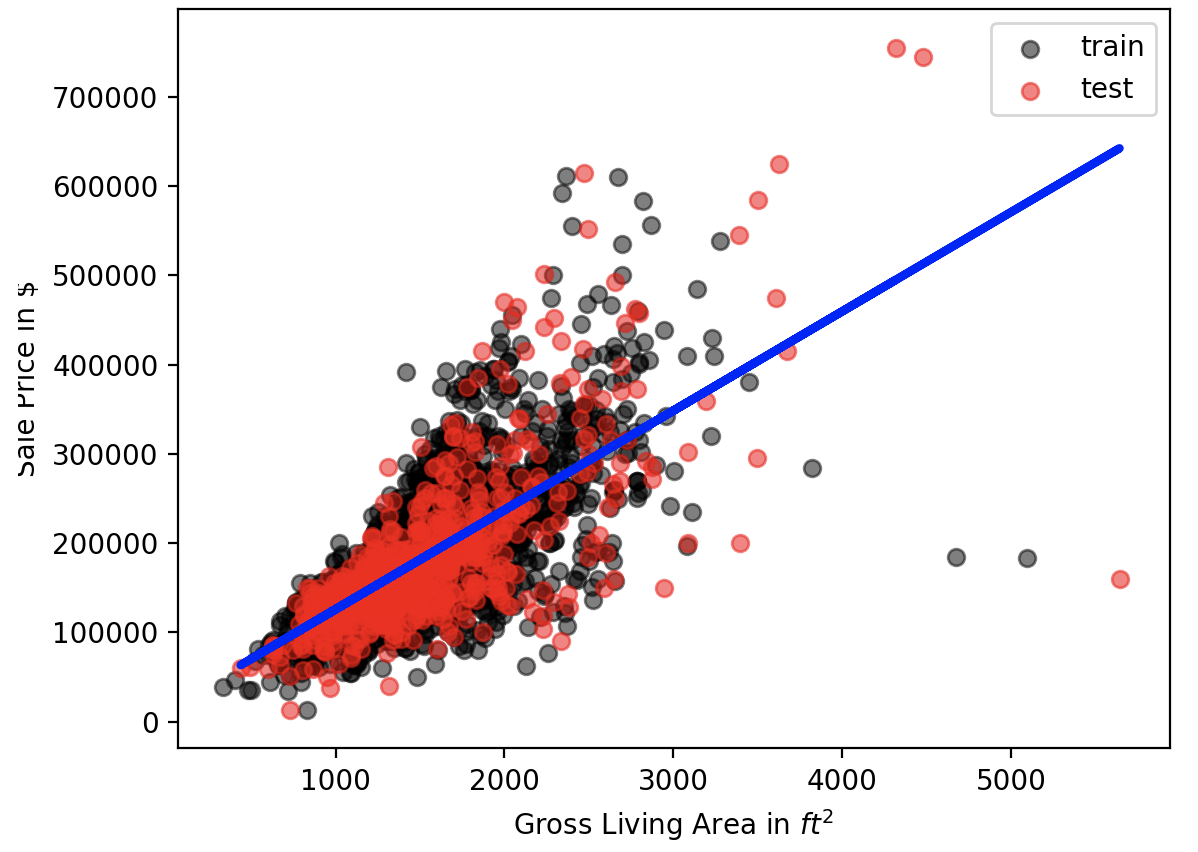

# Accuracy
- Accuracy: What percent of all your predictions are correct?
  - **Beware this may not be the best measure for your model**
  
  ###  **Importance of Recall and Precision vs Accuracy**
  - **Accuracy does not work for unbalanced classification data** (where there are more of one class than the other)
    - If you expect to see 1 security anomaly event for every 100,000 normal user events, you can achieve 99.999% _accuracy_ by coding a model that just predicts "_NO_" all the time.

# Recall
- Recall: Measures how well we do finding all the possible needles
  - How many needles can we find in the haystack?
  - What percent of the _all the needles_ did we find (classify as a needle)?
      - you can get 100% Recall by always saying "Yes" - but your precision & accuracy will be near 0

# Precision
- Precision: Measures how well we do when we claim something is a needle
  - How many predicted needles _really are_ needles?
  - What percent of our 'true' needle predictions are really needles?
  
### TODO:  Update image to show output of 5 needles - then flow to eval filter that show's truth measure
  
![precision_recall.png](precision_recall.png)